Class Distribution in Original Data:
1    357
0    212
Name: count, dtype: int64

Class Distribution in Training Set (After Normalization):
1    286
0    169
Name: count, dtype: int64

Class Distribution in Testing Set (After Normalization):
1    71
0    43
Name: count, dtype: int64


/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yrizvi/miniconda3/envs/ML/lib/python3.9/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. 

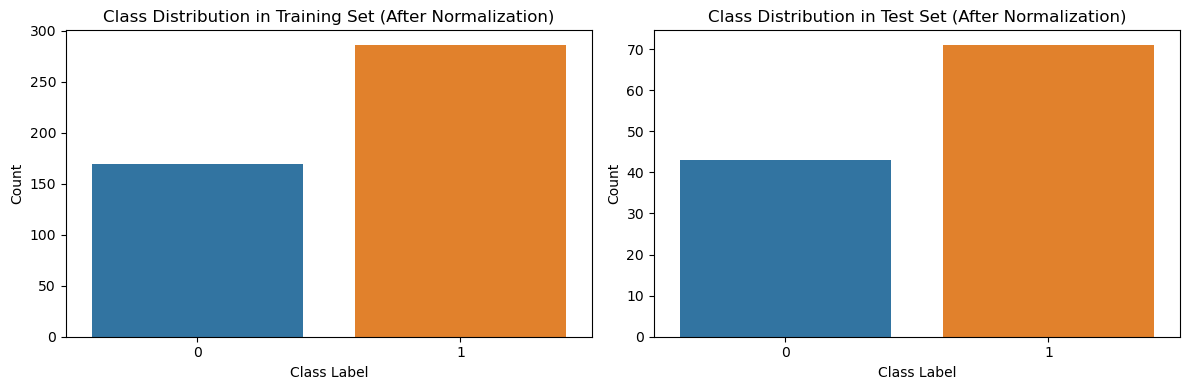

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, homogeneity_score, confusion_matrix, accuracy_score, adjusted_mutual_info_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
import warnings
from sklearn.decomposition import FastICA
from sklearn.tree import DecisionTreeClassifier

# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Print class distribution before normalization
print("Class Distribution in Original Data:")
print(pd.Series(y).value_counts())

# Handling missing NaN values (replacing with mean)
X = np.nan_to_num(X)

# Splitting data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing the data between 0 and 1
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Print class distribution after normalization
print("\nClass Distribution in Training Set (After Normalization):")
print(pd.Series(y_train).value_counts())

print("\nClass Distribution in Testing Set (After Normalization):")
print(pd.Series(y_test).value_counts())

# 4. Visualize class distribution
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_train)
plt.title("Class Distribution in Training Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.subplot(1, 2, 2)
sns.countplot(x=y_test)
plt.title("Class Distribution in Test Set (After Normalization)")
plt.xlabel("Class Label")
plt.ylabel("Count")

plt.tight_layout()
plt.show()

       IC_1      IC_2      IC_3      IC_4      IC_5      IC_6      IC_7  \
0  0.490843 -0.167000  8.747026  0.508080  0.835703  0.197909  0.591965   
1 -0.211909 -0.666661 -0.157831  0.361833 -1.153606  1.329125 -0.147009   
2 -2.033022 -0.591439  0.443231  0.776104  0.134209 -2.886741  0.930333   
3  0.255597 -0.325685 -0.013438  0.381319  0.146344 -1.069247 -0.287875   
4 -0.321461 -5.634269 -0.424624 -0.326543 -1.326395 -2.705939  0.402458   

       IC_8      IC_9     IC_10  ...     IC_21     IC_22     IC_23     IC_24  \
0 -3.024338 -2.715650 -0.206041  ...  0.203693 -3.035489  0.387332  0.082748   
1  0.080877 -0.298413  1.173517  ...  0.883220 -0.641823 -1.838260  1.130258   
2 -1.221253 -0.262522 -1.046038  ... -1.499867  0.536681 -0.527211 -0.231325   
3  0.314587 -0.017475 -0.100633  ...  0.807105 -0.061555  0.388263 -0.225443   
4  0.086683 -0.218234 -0.042947  ... -0.587272  0.691986  0.166038  0.162433   

      IC_25     IC_26     IC_27     IC_28     IC_29     IC_30  
0  6

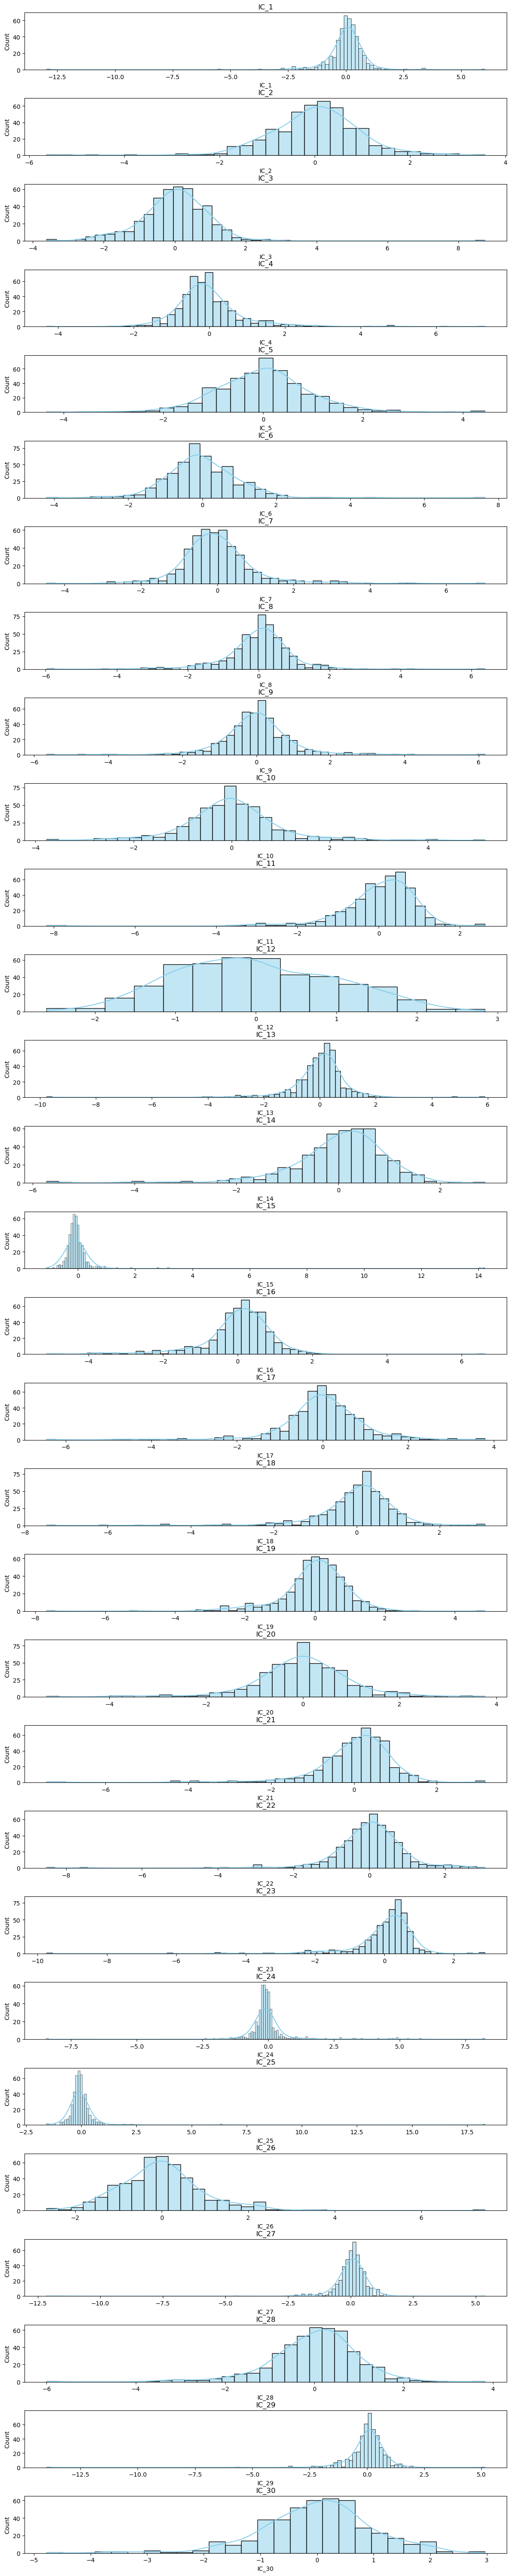

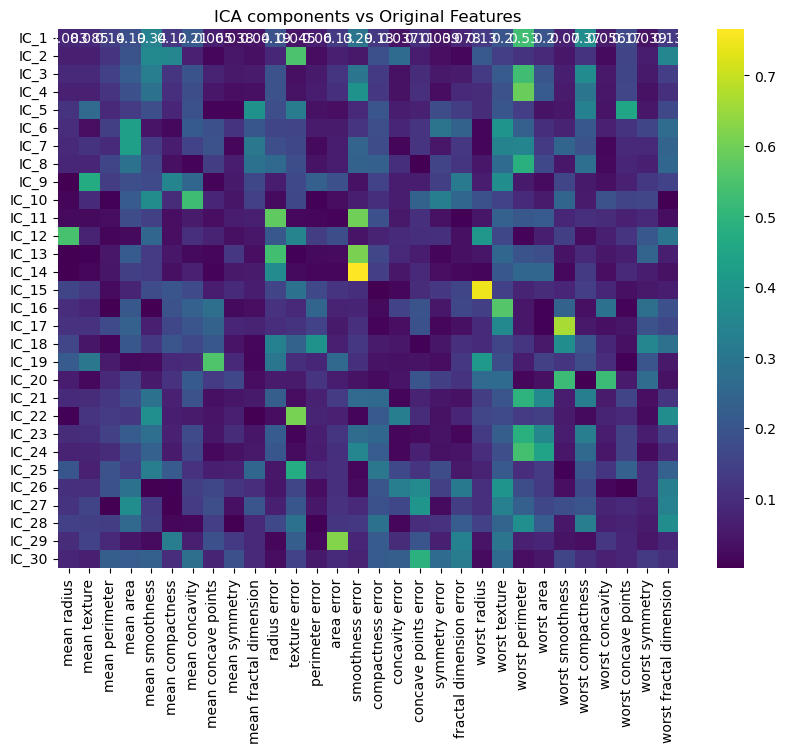

Accuracy (ICA): 74.56%
Accuracy (Original): 94.74%
Reconstruction error: 1.9814654776987046e-29


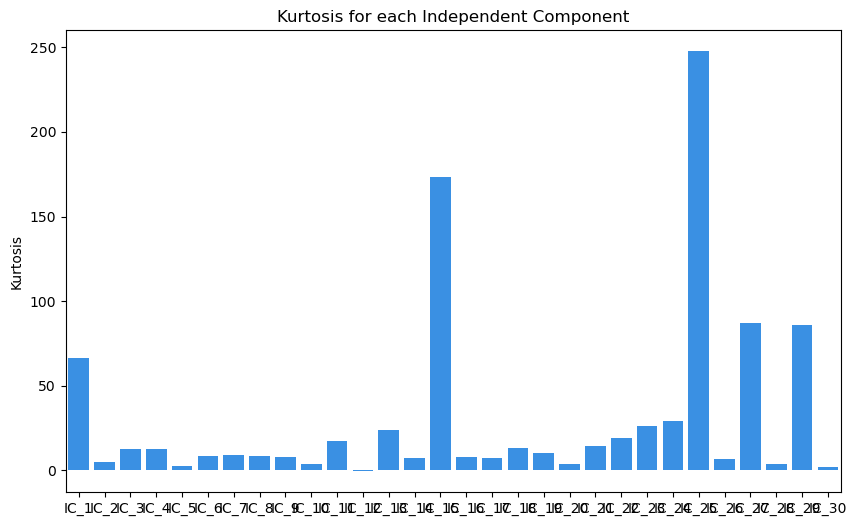

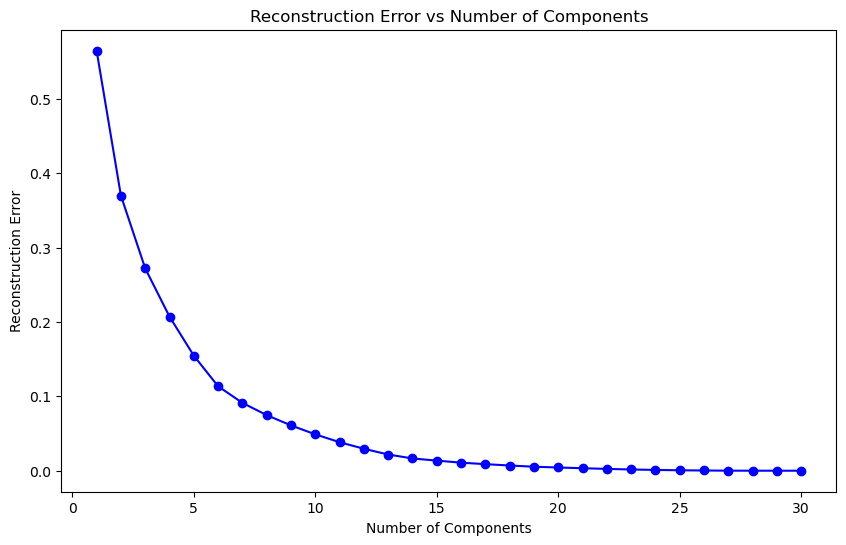

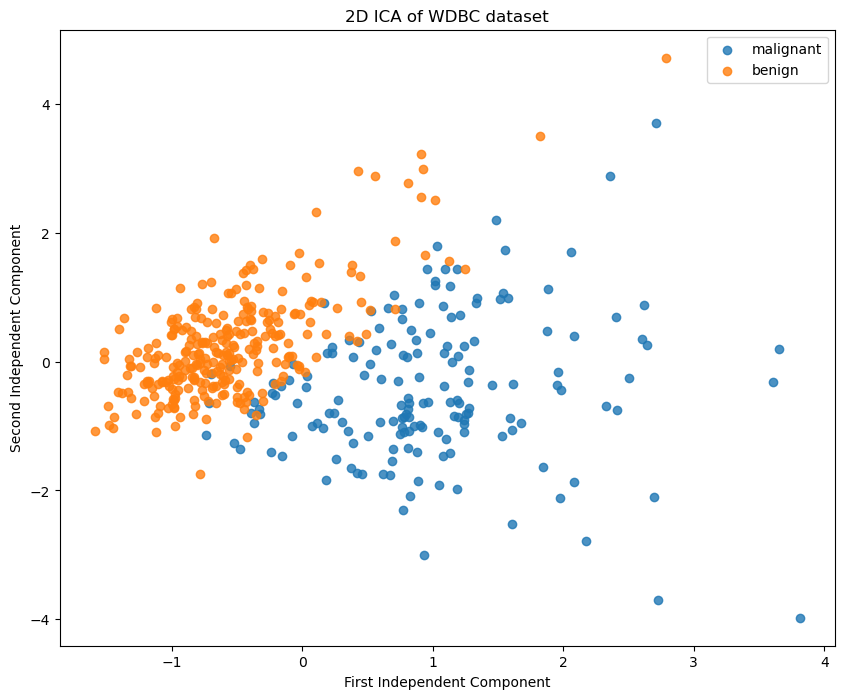

In [3]:
import warnings
from sklearn.decomposition import FastICA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, mean_squared_error
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Following up with the ICA analysis
with warnings.catch_warnings():
    warnings.simplefilter(action='ignore', category=FutureWarning)

    # Number of components to extract
    n_components = X_train.shape[1]

    # Perform ICA
    ica = FastICA(n_components=n_components, random_state=42, max_iter=2000, tol=0.01)
    X_train_ICA = ica.fit_transform(X_train)

    # Convert the ICA-transformed data into a DataFrame for visualization
    ica_df = pd.DataFrame(X_train_ICA, columns=[f'IC_{i+1}' for i in range(n_components)])
    print(ica_df.head())

    # Plotting distributions of independent components
    plt.figure(figsize=(12, 2 * n_components))
    for i, col in enumerate(ica_df.columns):
        plt.subplot(n_components, 1, i + 1)
        sns.histplot(ica_df[col], kde=True, color='skyblue')
        plt.title(col)
        plt.tight_layout()

    plt.subplots_adjust(hspace=0.5)
    plt.show()

    # Create heatmap for ICA components vs original features
    feature_names = data.feature_names
    plt.figure(figsize=(10, 7))
    sns.heatmap(abs(ica.mixing_), cmap='viridis', annot=True, yticklabels=[f'IC_{i+1}' for i in range(n_components)], xticklabels=feature_names)
    plt.title('ICA components vs Original Features')
    plt.show()

    # Train models
    clf_ica = DecisionTreeClassifier(random_state=42)
    clf_ica.fit(X_train_ICA, y_train)
    y_pred_ica = clf_ica.predict(ica.transform(X_test))
    print(f"Accuracy (ICA): {accuracy_score(y_test, y_pred_ica)*100:.2f}%")

    clf = DecisionTreeClassifier(random_state=42)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(f"Accuracy (Original): {accuracy_score(y_test, y_pred)*100:.2f}%")

    # Reconstruction error
    X_train_ICA_reconstructed = ica.inverse_transform(X_train_ICA)
    reconstruction_error = mean_squared_error(X_train, X_train_ICA_reconstructed)
    print(f"Reconstruction error: {reconstruction_error}")

    # Compute kurtosis for each IC
    from scipy.stats import kurtosis
    kurt_values = [kurtosis(ica_df[col]) for col in ica_df.columns]
    plt.figure(figsize=(10, 6))
    sns.barplot(x=[f'IC_{i+1}' for i in range(n_components)], y=kurt_values, color='dodgerblue')
    plt.title('Kurtosis for each Independent Component')
    plt.ylabel('Kurtosis')
    plt.show()

    # Reconstruction error vs number of components
    reconstruction_errors = []
    for n in range(1, X_train.shape[1] + 1):
        ica = FastICA(n_components=n, random_state=42, max_iter=2000, tol=0.01)
        X_train_ICA = ica.fit_transform(X_train)
        X_train_ICA_reconstructed = ica.inverse_transform(X_train_ICA)
        error = mean_squared_error(X_train, X_train_ICA_reconstructed)
        reconstruction_errors.append(error)

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, X_train.shape[1] + 1), reconstruction_errors, marker='o', color='b')
    plt.title('Reconstruction Error vs Number of Components')
    plt.xlabel('Number of Components')
    plt.ylabel('Reconstruction Error')
    plt.show()

    # 2D ICA for WDBC (the dataset has only two target classes, not three like the wine dataset)
    ica_2D = FastICA(n_components=2, random_state=42)
    X_train_ICA_2D = ica_2D.fit_transform(X_train)

    # Plot
    plt.figure(figsize=(10, 8))
    for i, target_name in zip([0, 1], ['malignant', 'benign']):
        plt.scatter(X_train_ICA_2D[y_train == i, 0], X_train_ICA_2D[y_train == i, 1], alpha=0.8, label=target_name)
    plt.legend(loc='best')
    plt.title('2D ICA of WDBC dataset')
    plt.xlabel('First Independent Component')
    plt.ylabel('Second Independent Component')
    plt.show()